In [1]:
import sys
sys.path.insert(0, './ml')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml.gs_svm import grid_search
from ml.SVM_RF import run as run_model

from features.spatial_features_calc import get_spatial_features_names
from features.morphological_features_calc import get_morphological_features_names
from features.temporal_features_calc import get_temporal_features_names
import ML_util

In [2]:
chunks = [0, 500, 200]
modalities = ['spatial', 'morphological', 'temporal']
restrictions = ['complete', 'no_small_sample']

min_gamma = -9
max_gamma = -1
num_gamma = 9
min_c = 0
max_c = 6
num_c = 7
kernel = 'rbf'
n = 5

In [3]:
def get_modality_results(data_path):
    accs, pyr_accs, in_accs = [], [], []
    
    _, acc, pyr_acc, in_acc, C, gamma = grid_search(data_path + "/0_0.60.20.2/", False, None, min_gamma,
                                                    max_gamma, num_gamma, min_c, max_c, num_c, kernel, n)
    accs.append(acc)
    pyr_accs.append(pyr_acc)
    in_accs.append(in_acc)
    
    restriction, modality = data_path.split('/')[-2:]
    
    if modality == 'temporal':
        accs = accs * len(chunks)
        pyr_accs = pyr_accs * len(chunks)
        in_accs = in_accs * len(chunks)
    else:
        for chunk_size in chunks[1:]:
            _, acc, pyr_acc, in_acc = run_model('svm', None, None, None, False, None, False, True, False, gamma, C, 'rbf',
                None, None, None, None, data_path + f"/{chunk_size}_0.60.20.2/")
            accs.append(acc)
            pyr_accs.append(pyr_acc)
            in_accs.append(in_acc)
        
        
    df = pd.DataFrame({'restriction': restriction, 'modality': modality, 'chunk_size': chunks,
                           'accs': accs, 'pyr_accs': pyr_accs, 'in_accs': in_accs})
    
    return df
                                       
def get_folder_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for modality in modalities:
        modaility_df = get_modality_results(data_path + '/' + modality)
        df = df.append(modaility_df, ignore_index=True)
        
    return df

def get_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for restriction in restrictions:
        folder_df = get_folder_results(data_path + '/' + restriction)
        df = df.append(folder_df, ignore_index=True)
        
    return df    

In [4]:
results = get_results('./data_sets')

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 306 (59.188%) consisting of 306 waveforms (59.188%)
Total number of pyramidal clusters in train data is 248 (81.046%) consisting of 248 waveforms (81.046%)
Total number of interneurons clusters in train data is 58 (18.954%) consisting of 58 waveforms (18.954%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 173 (33.462%) consisting of 173 waveforms (33.462%)
Total number of pyramidal clusters in dev data is 144 (83.237%) consisting of 144 waveforms (83.237%)
Total number of interneurons clusters in dev data is 29 (16.763%) consisting of 29 waveforms (16.763%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 38 (7.350%) consisting of 38 waveforms (7.350%)
Total number of pyramidal clusters in test data is 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-09, score=0.177, total=   0.1s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.179, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .

[CV] ................. C=10.0, gamma=1e-06, score=0.812, total=   0.0s
[CV] C=10.0, gamma=1e-06 .............................................
[CV] ................. C=10.0, gamma=1e-06, score=0.812, total=   0.0s
[CV] C=10.0, gamma=1e-06 .............................................
[CV] ................. C=10.0, gamma=1e-06, score=0.179, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.177, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.177, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.812, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.812, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] .

[CV] .................. C=100.0, gamma=0.1, score=0.948, total=   0.0s
[CV] C=100.0, gamma=0.1 ..............................................
[CV] .................. C=100.0, gamma=0.1, score=0.884, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.823, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.823, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.179, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-06, score=0.896, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.854, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.853, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.833, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.885, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.896, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.896, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .

[CV] ............. C=100000.0, gamma=0.001, score=0.781, total=   0.4s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.938, total=   0.5s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.844, total=   0.4s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.896, total=   0.4s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.863, total=   0.4s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.750, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.927, total=   0.1s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   18.4s finished


Total number of clusters in train data is 306 (59.188%) consisting of 30732 waveforms (61.344%)
Total number of pyramidal clusters in train data is 248 (81.046%) consisting of 8128 waveforms (26.448%)
Total number of interneurons clusters in train data is 58 (18.954%) consisting of 22604 waveforms (73.552%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 173 (33.462%) consisting of 17420 waveforms (34.772%)
Total number of pyramidal clusters in dev data is 144 (83.237%) consisting of 5138 waveforms (29.495%)
Total number of interneurons clusters in dev data is 29 (16.763%) consisting of 12282 waveforms (70.505%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 38 (7.350%) consisting of 1946 waveforms (3.884%)
Total number of pyramidal clusters in test data is 19 (50.000%) consisting of 274 waveforms (14.080%)
Tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-07, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.179, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .

[CV] ................ C=10.0, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.979, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.990, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.958, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.979, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-09, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.179, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.823, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.823, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.179, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-06, score=0.979, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.990, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.969, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.979, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.990, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] .

[CV] ............... C=100000.0, gamma=0.1, score=0.979, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.927, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.958, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.979, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.968, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.979, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.990, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    3.6s finished


Total number of clusters in train data is 306 (59.188%) consisting of 30732 waveforms (61.344%)
Total number of pyramidal clusters in train data is 248 (81.046%) consisting of 8128 waveforms (26.448%)
Total number of interneurons clusters in train data is 58 (18.954%) consisting of 22604 waveforms (73.552%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 173 (33.462%) consisting of 17420 waveforms (34.772%)
Total number of pyramidal clusters in dev data is 144 (83.237%) consisting of 5138 waveforms (29.495%)
Total number of interneurons clusters in dev data is 29 (16.763%) consisting of 12282 waveforms (70.505%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 38 (7.350%) consisting of 1946 waveforms (3.884%)
Total number of pyramidal clusters in test data is 19 (50.000%) consisting of 274 waveforms (14.080%)
Tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-08, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.812, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.179, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.177, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .

[CV] ................. C=10.0, gamma=0.001, score=0.865, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.917, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.812, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.927, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.895, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.875, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.917, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-08, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.179, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.823, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.823, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.179, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] .

[CV] ............. C=10000.0, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.906, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.927, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.926, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.906, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.927, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .

[CV] .............. C=100000.0, gamma=0.01, score=0.938, total=   0.4s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.926, total=   0.4s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.927, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.906, total=   0.1s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.875, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.927, total=   0.1s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.916, total=   0.1s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   21.9s finished


Grid search completed in 22.09 seconds, best parameters are:
{'C': 10000.0, 'gamma': 0.1}

Starting evaluation on test set...
Loading data set from ./data_sets/no_small_sample/spatial/0_0.60.20.2/...
Total number of clusters in train data is 194 (56.395%) consisting of 194 waveforms (56.395%)
Total number of pyramidal clusters in train data is 144 (74.227%) consisting of 144 waveforms (74.227%)
Total number of interneurons clusters in train data is 50 (25.773%) consisting of 50 waveforms (25.773%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 126 (36.628%) consisting of 126 waveforms (36.628%)
Total number of pyramidal clusters in dev data is 97 (76.984%) consisting of 97 waveforms (76.984%)
Total number of interneurons clusters in dev data is 29 (23.016%) consisting of 29 waveforms (23.016%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total numb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.297, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .

[CV] ................. C=10.0, gamma=1e-05, score=0.750, total=   0.0s
[CV] C=10.0, gamma=1e-05 .............................................
[CV] ................. C=10.0, gamma=1e-05, score=0.750, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.781, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.672, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.734, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.703, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-09, score=0.391, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............... C=1000.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.297, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.859, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.844, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.828, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.844, total=   0.0s
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] .............. C=10000.0, gamma=1e-06, score=0.859, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.828, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .

[CV] ............ C=100000.0, gamma=0.0001, score=0.781, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.812, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.719, total=   0.2s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.875, total=   0.2s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.938, total=   0.2s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.844, total=   0.1s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.766, total=   0.2s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    7.0s finished


Chosen model is SVM
Loading data set from ./data_sets/no_small_sample/spatial/500_0.60.20.2/...
Total number of clusters in train data is 194 (56.395%) consisting of 29781 waveforms (61.341%)
Total number of pyramidal clusters in train data is 144 (74.227%) consisting of 7262 waveforms (24.385%)
Total number of interneurons clusters in train data is 50 (25.773%) consisting of 22519 waveforms (75.615%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 126 (36.628%) consisting of 16925 waveforms (34.861%)
Total number of pyramidal clusters in dev data is 97 (76.984%) consisting of 4643 waveforms (27.433%)
Total number of interneurons clusters in dev data is 29 (23.016%) consisting of 12282 waveforms (72.567%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 24 (6.977%) consisting of 1844 waveforms (3.798%)
Total numb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-05, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.750, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.797, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-06, score=0.750, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................ C=100.0, gamma=1e-06, score=0.750, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.984, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.984, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.984, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=1.000, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.969, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-09, score=0.250, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.797, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.250, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.250, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.250, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.250, total=   0.0s
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] .............. C=10000.0, gamma=1e-07, score=0.984, total=   0.0s
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] .

[CV] ............... C=100000.0, gamma=0.1, score=0.922, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.984, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.953, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.812, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.922, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.969, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.953, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    1.6s finished


Total number of pyramidal clusters in train data is 144 (74.227%) consisting of 7262 waveforms (24.385%)
Total number of interneurons clusters in train data is 50 (25.773%) consisting of 22519 waveforms (75.615%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 126 (36.628%) consisting of 16925 waveforms (34.861%)
Total number of pyramidal clusters in dev data is 97 (76.984%) consisting of 4643 waveforms (27.433%)
Total number of interneurons clusters in dev data is 29 (23.016%) consisting of 12282 waveforms (72.567%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 24 (6.977%) consisting of 1844 waveforms (3.798%)
Total number of pyramidal clusters in test data is 7 (29.167%) consisting of 186 waveforms (10.087%)
Total number of interneurons clusters in test data is 17 (70.833%) consisting of 1658 waveforms (89.9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .................. C=1.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.672, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .................. C=1.0, gamma=1e-08, score=0.750, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .

[CV] ................... C=10.0, gamma=0.1, score=0.906, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.906, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.875, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.234, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.750, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-07, score=0.672, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.750, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.797, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.859, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] .

[CV] ............. C=10000.0, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.922, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.922, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.906, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.828, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.859, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.969, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .

[CV] .............. C=100000.0, gamma=0.01, score=0.938, total=   0.1s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.906, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.859, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.906, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.922, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.906, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] ............ C=1000000.0, gamma=1e-09, score=0.781, total=   0.0s
[CV] C=1000000.0, gamma=1e-09 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    5.8s finished


In [5]:
print(results)

        restriction       modality  chunk_size       accs    pyr_accs  \
0          complete        spatial         0.0  78.947368  100.000000   
1          complete        spatial       500.0  81.578947   89.473684   
2          complete        spatial       200.0  78.947368   84.210526   
3          complete  morphological         0.0  97.368421  100.000000   
4          complete  morphological       500.0  86.842105   84.210526   
5          complete  morphological       200.0  92.105263   89.473684   
6          complete       temporal         0.0  76.315789   94.736842   
7          complete       temporal       500.0  76.315789   94.736842   
8          complete       temporal       200.0  76.315789   94.736842   
9   no_small_sample        spatial         0.0  83.333333  100.000000   
10  no_small_sample        spatial       500.0  83.333333  100.000000   
11  no_small_sample        spatial       200.0  83.333333  100.000000   
12  no_small_sample  morphological         0.0  91.

In [6]:
results = results.set_index(['restriction', 'modality', 'chunk_size'], append=True)  # create multi-index

In [7]:
results.to_csv('results_for_report.csv')

In [8]:
results

,,,,accs,pyr_accs,in_accs
,restriction,modality,chunk_size,,,
0,complete,spatial,0.0,78.947368,100.000000,57.894737
1,complete,spatial,500.0,81.578947,89.473684,73.684211
2,complete,spatial,200.0,78.947368,84.210526,73.684211
3,complete,morphological,0.0,97.368421,100.000000,94.736842
4,complete,morphological,500.0,86.842105,84.210526,89.473684
5,complete,morphological,200.0,92.105263,89.473684,94.736842
6,complete,temporal,0.0,76.315789,94.736842,57.894737
7,complete,temporal,500.0,76.315789,94.736842,57.894737
8,complete,temporal,200.0,76.315789,94.736842,57.894737


In [9]:
def get_num_cells(restriction):
    data_path = f"./data_sets/{restriction}/spatial/0_0.60.20.2/"
    train, dev, test, _, _, _ = ML_util.get_dataset(data_path)
    tot_n = len(train) + len(dev) + len(test)
    test_n = len(test)
    pyr_n = len([cell for cell in test if cell[0][-1] == 1])
    in_n = len([cell for cell in test if cell[0][-1] == 0])
    return tot_n, test_n, pyr_n, in_n

def autolabel(rects, ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    This function was taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    """
    for rect in rects:
        height = rect.get_height()
        if height == 0:
            continue
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def plot_results(df, restriction):
    tot_n, test_n, pyr_n, in_n = get_num_cells(restriction)
    
    labels = modalities
    
    zero = df.xs(0, level="chunk_size").accs
    five_hundred = df.xs(500, level="chunk_size").accs
    two_hundred = df.xs(200, level="chunk_size").accs

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (12, 12))
    rects1 = ax.bar(x - width, zero, width, label='chunk_size = 0')
    rects2 = ax.bar(x, five_hundred, width, label='chunk_size = 500')
    rects3 = ax.bar(x + width, two_hundred, width, label='chunk_size = 200')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (percentage)')
    ax.set_title(f"Scores by modality and chunk size; Total={tot_n}, Test={test_n}, PYR={pyr_n}, IN={in_n}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    autolabel(rects1, ax)
    autolabel(rects2, ax)
    autolabel(rects3, ax)

    fig.tight_layout()

    plt.show()

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 306 (59.188%) consisting of 306 waveforms (59.188%)
Total number of pyramidal clusters in train data is 248 (81.046%) consisting of 248 waveforms (81.046%)
Total number of interneurons clusters in train data is 58 (18.954%) consisting of 58 waveforms (18.954%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 173 (33.462%) consisting of 173 waveforms (33.462%)
Total number of pyramidal clusters in dev data is 144 (83.237%) consisting of 144 waveforms (83.237%)
Total number of interneurons clusters in dev data is 29 (16.763%) consisting of 29 waveforms (16.763%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 38 (7.350%) consisting of 38 waveforms (7.350%)
Total number of pyramidal clusters in test data is 1

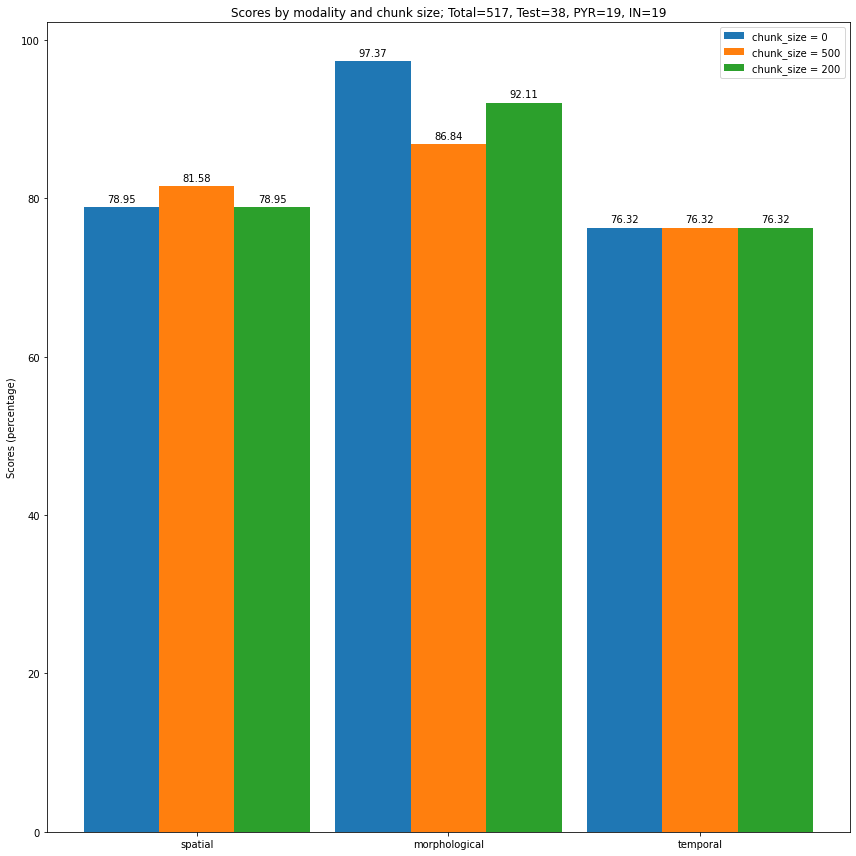

In [10]:
complete = results.loc[:, 'complete', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(complete, 'complete')

Loading data set from ./data_sets/no_small_sample/spatial/0_0.60.20.2/...
Total number of clusters in train data is 194 (56.395%) consisting of 194 waveforms (56.395%)
Total number of pyramidal clusters in train data is 144 (74.227%) consisting of 144 waveforms (74.227%)
Total number of interneurons clusters in train data is 50 (25.773%) consisting of 50 waveforms (25.773%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 126 (36.628%) consisting of 126 waveforms (36.628%)
Total number of pyramidal clusters in dev data is 97 (76.984%) consisting of 97 waveforms (76.984%)
Total number of interneurons clusters in dev data is 29 (23.016%) consisting of 29 waveforms (23.016%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 24 (6.977%) consisting of 24 waveforms (6.977%)
Total number of pyramidal clusters in test data

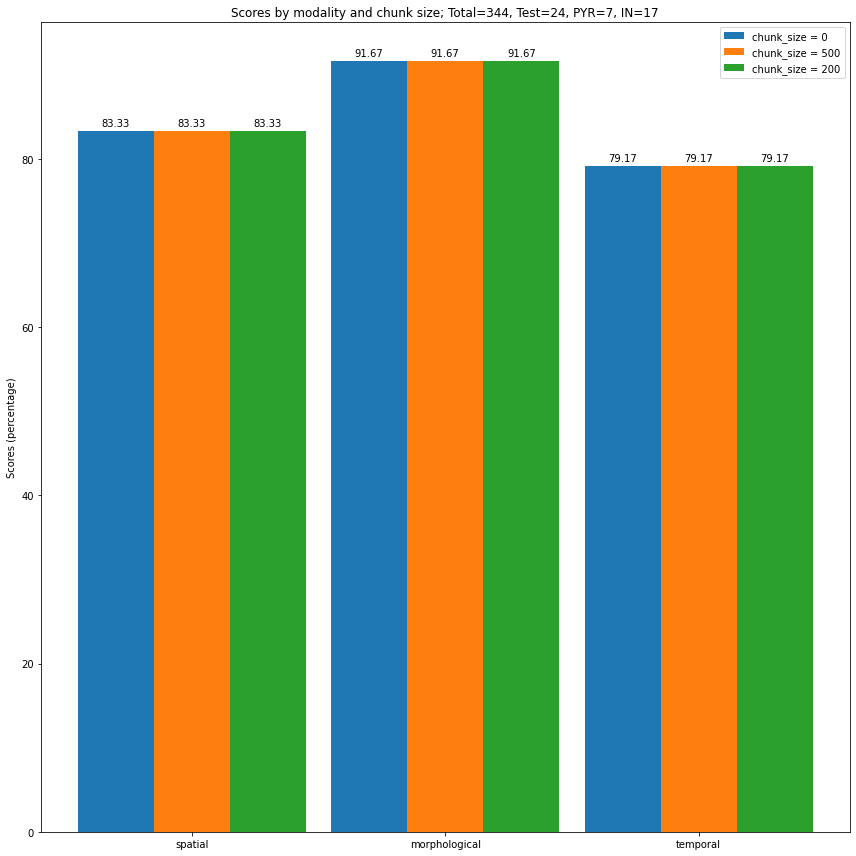

In [11]:
no_small_sample = results.loc[:, 'no_small_sample', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_small_sample, 'no_small_sample')